In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [25]:
df= pd.read_csv('Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [26]:
df.shape

(205, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [28]:
#checking if any null values present
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [29]:
#describing the dataset
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [30]:
#setting date as index column
df.set_index(['Date'], inplace= True)

# Checking for relationship of amount spent in each add to profit

<AxesSubplot:xlabel='Add5(in Thousands)', ylabel='Profit(in Thousands)'>

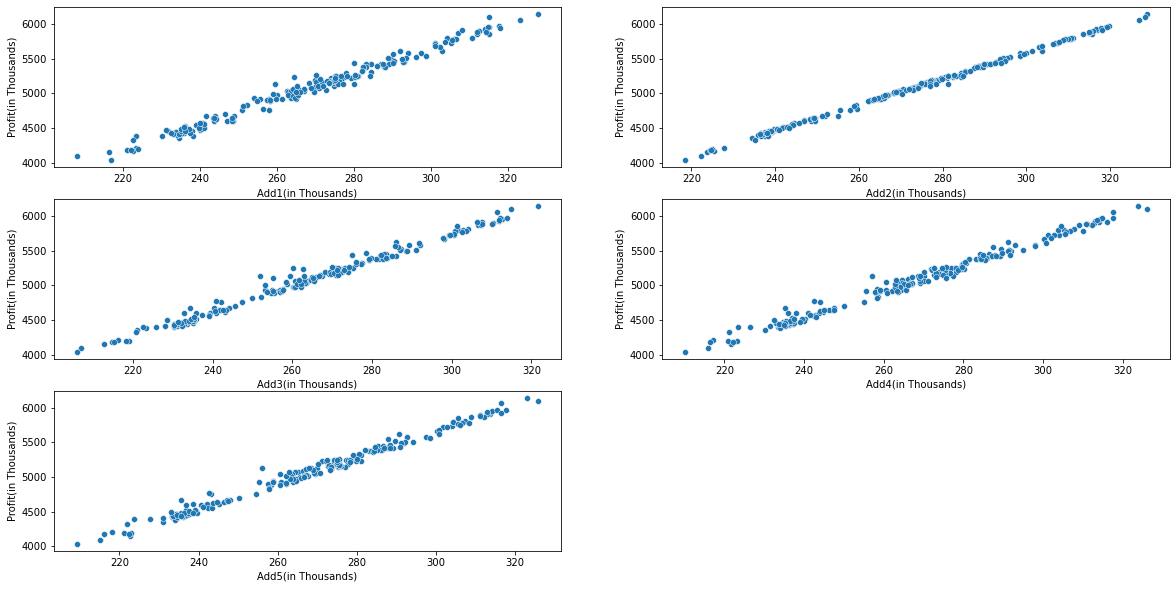

In [31]:
#plotting scatter plot to get an idea about how values are related to profit
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
sns.scatterplot(df['Add1(in Thousands)'],df['Profit(in Thousands)'])
plt.subplot(3,2,2)
sns.scatterplot(df['Add2(in Thousands)'],df['Profit(in Thousands)'])
plt.subplot(3,2,3)
sns.scatterplot(df['Add3(in Thousands)'],df['Profit(in Thousands)'])
plt.subplot(3,2,4)
sns.scatterplot(df['Add4(in Thousands)'],df['Profit(in Thousands)'])
plt.subplot(3,2,5)
sns.scatterplot(df['Add5(in Thousands)'],df['Profit(in Thousands)'])

In [32]:
#quick correlation check
correlation= df.corr()
correlation

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

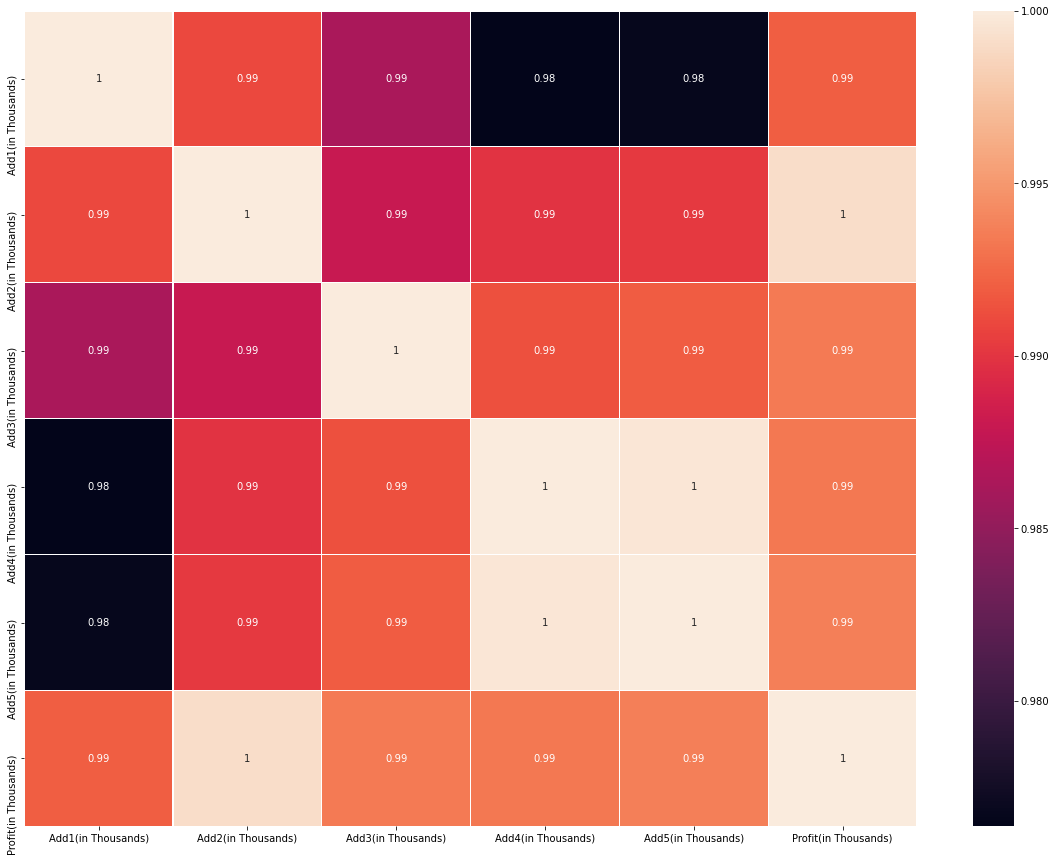

In [33]:
#plotting heatmap for correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(correlation,annot= True, linewidths= 0.2)

From the heatmap itself we can see that amounts of each add is highly correlated to profit. Thus we can infer that, when amount spend at each add company increases profit also increases

# Regression model

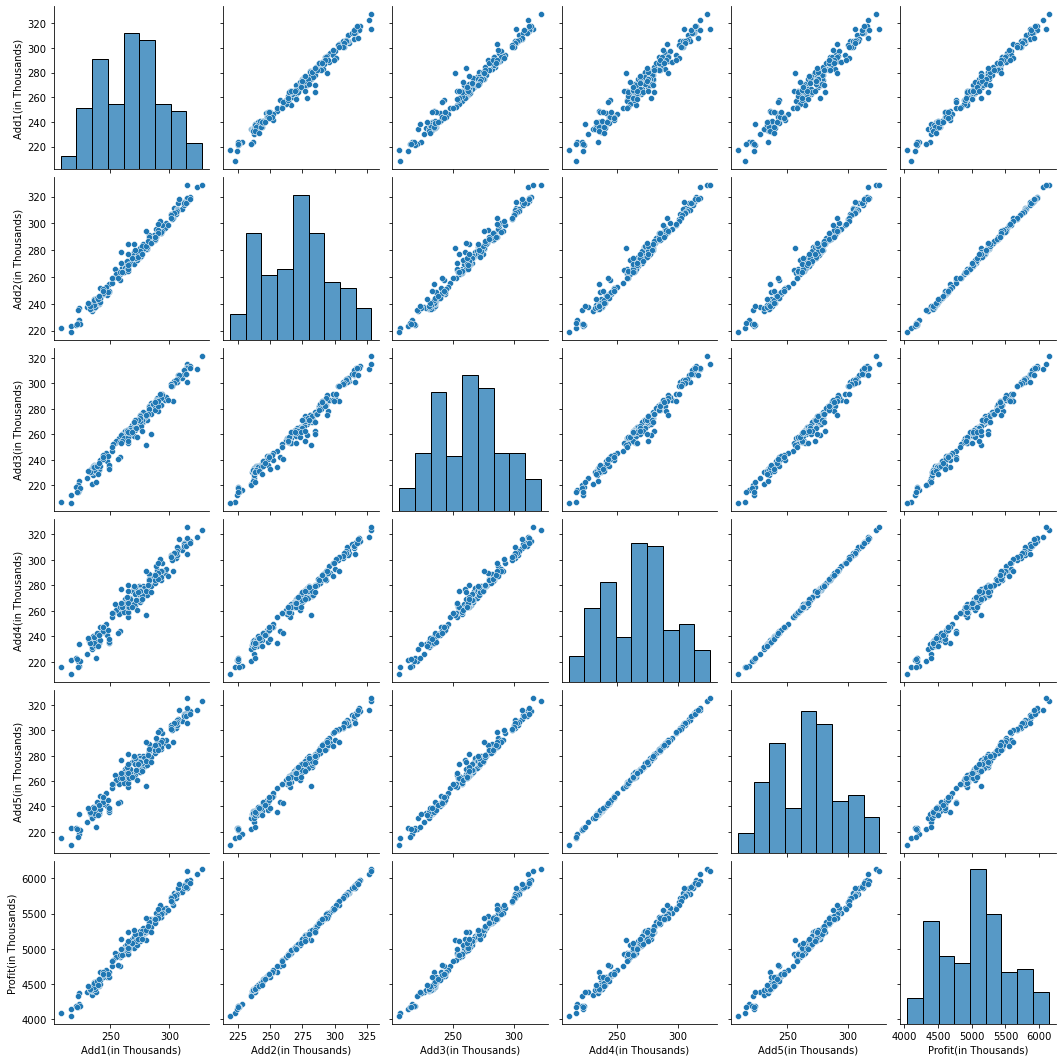

In [34]:
sns.pairplot(df)

In [35]:
Y= df['Profit(in Thousands)']
x= df.drop('Profit(in Thousands)',axis=1)

In [36]:
#Spliting the dataset into traning and testing data
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test= train_test_split(x,Y,test_size=0.2, random_state=465)

In [38]:
#create and fit the model
# create a linear regression model object
from sklearn.linear_model import LinearRegression
reg_model= LinearRegression()

In [39]:
reg_model.fit(X_train,y_train)

LinearRegression()